https://www.springboard.com/blog/data-mining-python-tutorial/

http://www.developintelligence.com/blog/2017/08/data-cleaning-pandas-python/


https://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/

Example of simple classification problem:
https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2

Cross-validation in sklearn
http://scikit-learn.org/stable/modules/cross_validation.html

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams

from collections import Counter

%matplotlib inline

## Load dataset

In [2]:
#load csv and create a copy to store cleaned values
df = pd.read_csv('ODI-2018.csv',skiprows=[1]) #skip first (empty) row
clean = df.copy()

#show first 10 responses
df.head(10)

Timestamp                     What programme are you in?  \
0  4/5/2018 11:22:56        Duisenberg Quantitative Risk Management   
1  4/5/2018 11:23:04                               Computer Science   
2  4/5/2018 11:23:06                             Business Analytics   
3  4/5/2018 11:23:50                                             BA   
4  4/5/2018 11:23:59  Master Computer Science: Big Data Engineering   
5  4/5/2018 11:24:34                      Drug discovery and safety   
6  4/5/2018 11:25:25                                             CS   
7  4/5/2018 11:25:25                          Computational Science   
8  4/5/2018 11:25:36                        M Financial Economtrics   
9  4/5/2018 11:25:51         MSc Bioinformatics and Systems Biology   

  Have you taken a course on machine learning?  \
0                                           no   
1                                           no   
2                                          yes   
3                                          yes   
4                                           no   
5                                           no   
6                                          yes   
7                                           no   
8                                           no   
9                                          yes   

  Have you taken a course on information retrieval?  \
0                                                 0   
1                                                 0   
2                                                 1   
3                                                 1   
4                                                 0   
5                                                 0   
6                                                 1   
7                                                 0   
8                                                 0   
9                                                 1   

  Have you taken a course on statistics?  \
0                                     mu   
1                                unknown   
2                                  sigma   
3                                     mu   
4                                  sigma   
5                                     mu   
6                                     mu   
7                                     mu   
8                                     mu   
9                                unknown   

  Have you taken a course on databases? What is your gender?  \
0                                   nee                 male   
1                                    ja                 male   
2                                    ja                 male   
3                                    ja                 male   
4                                    ja                 male   
5                                   nee                 male   
6                                   nee                 male   
7                                    ja                 male   
8                                   nee                 male   
9                                    ja                 male   

                    Chocolate makes you..... When is your birthday (date)?  \
0                                    neither                    10/12/1994   
1  I have no idea what you are talking about                    06-08-1993   
2                                    neither                25 december 92   
3  I have no idea what you are talking about                    01-02-1995   
4  I have no idea what you are talking about                    09.01.1994   
5                                        fat                    17-08-1994   
6                                    neither                    27-09-1993   
7                                        fat                   14 May 1994   
8                                    neither                    11-04-1931   
9                                       slim                    19/08/1993   

  Number of neighbors s

In [3]:
#Check for null values
df.isnull().any()

#Due to skipping the first empty row, and the questionnaire requiring an
#answer for every question, no null values exist in the dataset

Timestamp                                                                                                                                                                                  False
What programme are you in?                                                                                                                                                                 False
Have you taken a course on machine learning?                                                                                                                                               False
Have you taken a course on information retrieval?                                                                                                                                          False
Have you taken a course on statistics?                                                                                                                                                     False
Have you taken a course on database

In [4]:
#Check for value types
df.dtypes

# No validation was used in the questionnaire, so every answer is of object-type

Timestamp                                                                                                                                                                                  object
What programme are you in?                                                                                                                                                                 object
Have you taken a course on machine learning?                                                                                                                                               object
Have you taken a course on information retrieval?                                                                                                                                          object
Have you taken a course on statistics?                                                                                                                                                     object
Have you taken a course on dat

In [5]:
#show some statistics of the dataset
df.describe()

Timestamp What programme are you in?  \
count                 217                        217   
unique                102                         91   
top     4/5/2018 11:27:32                         AI   
freq                    8                         37   

       Have you taken a course on machine learning?  \
count                                           217   
unique                                            3   
top                                             yes   
freq                                            120   

       Have you taken a course on information retrieval?  \
count                                                217   
unique                                                 3   
top                                                    0   
freq                                                 133   

       Have you taken a course on statistics?  \
count                                     217   
unique                                      3   
top                                        mu   
freq                                      189   

       Have you taken a course on databases? What is your gender?  \
count                                    217                  217   
unique                                     3                    3   
top                                      nee                 male   
freq                                     107                  150   

       Chocolate makes you..... When is your birthday (date)?  \
count                       217                           217   
unique                        5                           210   
top                         fat                    22/11/1991   
freq                         74                             2   

       Number of neighbors sitting around you? Did you stand up?  \
count                                      217               217   
unique                                      28                 3   
top                                          1                no   
freq                                        38               197   

       You can get £100 if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would get then?   \
count                                                 217                                                                                                                                        
unique                                                 82                                                                                                                                        
top                                                     1                                                                                                                                        
freq                                                   30                                                                                                                                        

       Give a random number Time you went to be Yesterday  \
count                   217                           217   
unique                   45                            99   
top                       7                         23:30   
freq                     36                            17   

       What makes a good day for you (1)? What makes a good day for you (2)?  
count                                 217                                217  
unique                                136                                156  
top                                   Sun                               Food  
freq                                   14                                  7

In [6]:
#Clean first column
#method taken from:
#https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict
data = df[df.columns[1]].str.lower()     #lowercase
data = data.str.strip()                  #remove space left and right of string
data = data.str.replace('&','and')       #replace & by and
clean[df.columns[1]] = data.replace(
    {'21-05-1995':np.NaN,
    'a. i.':'Artificial Intelligence',
    'ai':'Artificial Intelligence',
    'ai (cognitive sciences)':'Artificial Intelligence',
    'ai (vu version)':'Artificial Intelligence',
    'ai vu':'Artificial Intelligence',
    'ai premaster':'Artificial Intelligence',
    'artificial intelligence (socially aware computing)':'Artificial Intelligence',
    'artificial intelligence':'Artificial Intelligence',
    'ba':'Business Analytics',
    'b science, business and innovation':'Science, Business & Innovation',
    'big data engineering':'Computer Science',
    'bioinformatcis':'Bioinformatics & Systems Biology',
    'bioinformatics and system biology':'Bioinformatics & Systems Biology',
    'bioinformatics':'Bioinformatics & Systems Biology',
    'bioinformatics and systems biology':'Bioinformatics & Systems Biology',
    'bioinformatics and sysbio':'Bioinformatics & Systems Biology',
    'bioinformatics master':'Bioinformatics & Systems Biology',
    'business analytics msc':'Business Analytics',
    'business analytics/ operations research':'Business Analytics',
    'business analytics':'Business Analytics',
    'cls':'Computational Science',
    'cs':'Computer Science',
    'csl':'Computational Science',
    'comoputational science':'Computational Science',
    'computational science (jd)':'Computational Science',
    'computational science':'Computational Science',
    'computer science':'Computer Science',
    'computer science: big data engineering':'Computer Science',
    'data mining techniques':np.NaN,
    'drug discovery and safety':'Drug Discovery and Safety',
    'duisenberg honors program quantitative risk managament':'Quantitative Risk Management',
    'duisenberg quantitative risk management':'Quantitative Risk Management',
    'econometrics':'Econometrics',
    'econometrics and operations research':'Econometrics and Operations Research',
    'economics':'Economics',
    'eor':'Econometrics and Operations Research',
    'exchange':'Exchange student',
    'finance':'Finance',
    'finance dhp qrm':'Quantitative Risk Management',
    'm financial economtrics':'Econometrics',
    'ma bioinformatics':'Bioinformatics & Systems Biology',
    'master bionformatics and systems biology':'Bioinformatics & Systems Biology',
    'master business analytics':'Business Analytics',
    'master computer science: big data engineering':'Computer Science',
    'master econometrics and operations research':'Econometrics and Operations Research',
    'master human movement science':'Human Movement Sciences',
    'masters computer science(big data engineering)':'Computer Science',
    'mathematics':'Mathematics',
    'mathematics exchange':'Exchange student',
    'mpa':'Management, Policy-Analysis & Entrepreneurship in Health and Life Sciences',
    'ms':np.NaN,
    'msc ai and msc cls':'Artificial Intelligence',
    'msc artificial intelligence':'Artificial Intelligence',
    'msc bioinformatics':'Bioinformatics & Systems Biology',
    'msc bioinformatics and systems biology':'Bioinformatics & Systems Biology',
    'msc computational science':'Computational Science',
    'msc computational science (joint degree)':'Computational Science',
    'msc computer science':'Computer Science',
    'msc econometrics':'Econometrics',
    'msc. bioinformatics and systems biology':'Bioinformatics & Systems Biology',
    'or':'Econometrics and Operations Research',
    'phd':'PhD',
    'phd student':'PhD',
    'phd student at fgb':'PhD',
    'physics':'Physics',
    'qrm':'Quantitative Risk Management',
    'quantitative risk management':'Quantitative Risk Management',
    'system biology and bioinformatics':'Bioinformatics & Systems Biology'
    })

#show number of non-NaN values and number of NaN values after cleaning
print(df.columns[1])
print("#values: %d"%(clean[df.columns[1]].count()))
print("#NaN: %d"%(clean[df.columns[1]].isnull().sum()))

#show programmes sorted on occurance
Counter(clean[df.columns[1]].dropna()).most_common()

What programme are you in?
#values: 213
#NaN: 4


[('Artificial Intelligence', 51),
 ('Business Analytics', 44),
 ('Bioinformatics & Systems Biology', 28),
 ('Computational Science', 23),
 ('Computer Science', 21),
 ('Econometrics', 12),
 ('Quantitative Risk Management', 10),
 ('Econometrics and Operations Research', 9),
 ('PhD', 4),
 ('Exchange student', 3),
 ('Economics', 1),
 ('Management, Policy-Analysis & Entrepreneurship in Health and Life Sciences',
  1),
 ('Drug Discovery and Safety', 1),
 ('Finance', 1),
 ('Human Movement Sciences', 1),
 ('Mathematics', 1),
 ('Physics', 1),
 ('Science, Business & Innovation', 1)]

In [7]:
#replace labelled data by integers for later classification algorithms
clean[df.columns[2]] = df[df.columns[2]].replace({
    'yes':1,
    'no':0,
    'unknown':np.NaN
})

#print number of non-NaN values and number of NaN values after cleaning
print(df.columns[2])
print("#values: %d"%(clean[df.columns[2]].count()))
print("#unknown: %d"%(clean[df.columns[2]].isnull().sum()))

#show answer sorted on occurance
Counter(clean[df.columns[2]].dropna()).most_common()

Have you taken a course on machine learning?
#values: 214
#unknown: 3


[(1.0, 120), (0.0, 94)]

In [8]:
#replace labelled data by integers for later classification algorithms
clean[df.columns[3]] = df[df.columns[3]].replace({
    '1':1,
    '0':0,
    'unknown':np.NaN
})

#print number of non-NaN values and number of NaN values after cleaning
print(df.columns[3])
print("#values: %d"%(clean[df.columns[3]].count()))
print("#unknown: %d"%(clean[df.columns[3]].isnull().sum()))

#show answer sorted on occurance
Counter(clean[df.columns[3]].dropna()).most_common()

Have you taken a course on information retrieval?
#values: 214
#unknown: 3


[(0.0, 133), (1.0, 81)]

In [9]:
#replace labelled data by integers for later classification algorithms
clean[df.columns[4]] = df[df.columns[4]].replace({
    'mu':1,
    'sigma':0,
    'unknown':np.NaN
})

#print number of non-NaN values and number of NaN values after cleaning
print(df.columns[4])
print("#values: %d"%(clean[df.columns[4]].count()))
print("#unknown: %d"%(clean[df.columns[4]].isnull().sum()))

#show answer sorted on occurance
Counter(clean[df.columns[4]].dropna()).most_common()

Have you taken a course on statistics?
#values: 212
#unknown: 5


[(1.0, 189), (0.0, 23)]

In [10]:
#replace labelled data by integers for later classification algorithms
clean[df.columns[5]] = df[df.columns[5]].replace({
    'ja':1,
    'nee':0,
    'unknown':np.NaN
})

#print number of non-NaN values and number of NaN values after cleaning
print(df.columns[5])
print("#values: %d"%(clean[df.columns[5]].count()))
print("#unknown: %d"%(clean[df.columns[5]].isnull().sum()))

#show answer sorted on occurance
Counter(clean[df.columns[5]].dropna()).most_common()

Have you taken a course on databases?
#values: 211
#unknown: 6


[(0.0, 107), (1.0, 104)]

In [11]:
#replace labelled data by integers for later classification algorithms
clean[df.columns[6]] = df[df.columns[6]].replace({
    'unknown':np.NaN,
    'male':1,
    'female':0
})

#print number of non-NaN values and number of NaN values after cleaning
print(df.columns[6])
print("#values: %d"%(clean[df.columns[6]].count()))
print("#unknown: %d"%(clean[df.columns[6]].isnull().sum()))

#show answer sorted on occurance
Counter(clean[df.columns[6]].dropna()).most_common()

What is your gender?
#values: 213
#unknown: 4


[(1.0, 150), (0.0, 63)]

In [12]:
#replace labelled data by integers for later classification algorithms
clean[df.columns[7]] = df[df.columns[7]].replace({
    'unknown':np.NaN
})

#show answer sorted on occurance
print(df.columns[7])
Counter(clean[df.columns[7]].dropna()).most_common()

Chocolate makes you.....


[('fat', 74),
 ('neither', 70),
 ('I have no idea what you are talking about', 57),
 ('slim', 14)]

In [13]:
def clean_date(data):
    """
    Cleans date in dataset.
    
    Assumes date in format DD-MM, MM-DD, DD-MM-YYYY, MM-DD-YYYY, YYYY-MM-DD or MMM DDth
    Converts any other format to NaN.
    
    Note: may misclassify a MM-DD date as DD-MM when both DD and MM are less than 12    
    """
    
    #dict to replace month names to month number
    monthtoyear = {'january':1,'february':2,'march':3,'april':4,'may':5,\
                   'june':6,'july':7,'august':8,'september':9,'october':10,\
                   'november':11,'december':12,'aug':8,'februari':2}
    #replace DD/MM, DD.MM or DDth MMM notations
    data = data.str.replace("/","-")
    data = data.str.replace(".","-")
    data = data.str.replace(" ","-")
    data = data.str.replace("th","")
    
    #init empty list to store cleaned dates
    cleaned = []
    
    for i in data.values:
        #try to split string into DD, MM, YYYY
        try:
            date = i.split("-")
        except:
            date = np.NaN
        
        #convert first element, which may be DD, MMM or YYYY
        #e.g. 28-10-1994 or March 24th etc.
        try:
            first = int(date[0])
        except:
            try:
                first = monthtoyear[date[0].lower()]
            except:
                first = np.NaN
        
        #same for second element
        try:
            second = int(date[1])
        except:
            try:
                second = monthtoyear[date[1].lower()]
            except:
                second = np.NaN
        
        #third is always YYYY or DD, never MMM
        try:
            third = int(date[2])
        except:
            third = np.NaN
        
        if second > 12 and first <= 12:
            #assume MM-DD
            cleaned.append("%02d-%02d"%(second,first))
        elif first <= 31 and second <= 12:
            #assume DD-MM
            cleaned.append("%02d-%02d"%(first,second))
        elif first > 1900 and second <= 12 and third <= 31:
            #assume YYYY-MM-DD
            cleaned.append("%02d-%02d"%(third,second))
        elif first > 1900 and second <= 31 and third <= 12:
            #assume YYYY-DD-MM
            cleaned.append("%02d-%02d"%(second,third))
        else:
            #cannot get data, return NaN
            cleaned.append(np.NaN)
            
    cleaned = pd.Series(cleaned)
    return cleaned


#clean dates and print number of (non)-NaN values
print(df.columns[8])
clean[df.columns[8]] = clean_date(df[df.columns[8]])    
print("#values: %d"%(clean[df.columns[8]].count()))
print("#NaN: %d"%(clean[df.columns[8]].isnull().sum()))

#create figure
fig,ax = plt.subplots(figsize=(8,6))

#drop NaN, split on '-' and obtain months only
data = np.array(clean[df.columns[8]].dropna().str.split('-').values.tolist())[:,1]

#plot birth month
ax.hist(data.astype(int),np.arange(0.5,13.5,1),ec='black')
ax.set_title("Distribution of birth month")
ax.set_xlabel("Month")
ax.set_ylabel("Count")

#save histogram
fig.savefig("dist_month.pdf",bbox_inches='tight')

When is your birthday (date)?
#values: 203
#NaN: 14


In [14]:
#clean number of neighbours answers
data = df[df.columns[9]]
data = data.apply(pd.to_numeric,errors='coerce') #non-numeric -> NaN
data = data.mask(data.lt(0) | data.gt(8))        #cannot have more than 8 neighbours!
data = data.round()                              #can only have integer neighbours (error due to NaNs)
clean[df.columns[9]] = data

#print number of (non)-NaN values
print(df.columns[9])
print("#values: %d"%(clean[df.columns[9]].count()))
print("#NaN: %d"%(clean[df.columns[9]].isnull().sum()))

#plot histogram of distribution
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(data.dropna().values, np.arange(-0.5,9.5,1), ec='black');
ax.set_title("Distribution of number of neighbours")
ax.set_xlabel("Neighbours")
ax.set_ylabel("Count")

#print number of occurance
Counter(clean[df.columns[9]].dropna())

Number of neighbors sitting around you?
#values: 191
#NaN: 26


C:\Users\Nick\Miniconda3\envs\ml1labs\lib\site-packages\pandas\core\series.py:1342: RuntimeWarning: invalid value encountered in rint
  result = _values_from_object(self).round(decimals)


Counter({0.0: 7,
         1.0: 38,
         2.0: 33,
         3.0: 16,
         4.0: 16,
         5.0: 19,
         6.0: 22,
         7.0: 23,
         8.0: 17})

In [15]:
#clean column
clean[df.columns[10]] = df[df.columns[10]].replace({
    'yes':1,
    'no':0,
    'unknown':np.NaN
})

#print number of (non)-NaN values
print(df.columns[10])
print("#values: %d"%(clean[df.columns[10]].count()))
print("#NaN: %d"%(clean[df.columns[10]].isnull().sum()))

#print number of occurances
Counter(clean[df.columns[10]].dropna())

Did you stand up?
#values: 208
#NaN: 9


Counter({0.0: 197, 1.0: 11})

C:\Users\Nick\Miniconda3\envs\ml1labs\lib\site-packages\pandas\core\series.py:1342: RuntimeWarning: invalid value encountered in rint
  result = _values_from_object(self).round(decimals)


You can get £100 if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would get then? 
#values: 170
#NaN: 47


Counter({0.0: 10,
         0.05: 2,
         0.1: 1,
         0.25: 17,
         0.3: 4,
         0.33: 1,
         0.34: 1,
         0.37: 1,
         0.4: 3,
         0.46: 1,
         0.5: 4,
         0.75: 1,
         1.0: 31,
         2.0: 4,
         3.0: 3,
         4.0: 1,
         5.0: 14,
         6.0: 1,
         7.0: 1,
         10.0: 12,
         11.0: 1,
         14.0: 1,
         15.0: 1,
         20.0: 5,
         25.0: 5,
         27.0: 1,
         30.0: 1,
         40.0: 1,
         42.0: 1,
         50.0: 8,
         52.6: 1,
         70.0: 1,
         75.0: 1,
         80.0: 4,
         85.0: 1,
         90.0: 2,
         99.0: 1,
         99.99: 1,
         100.0: 20})

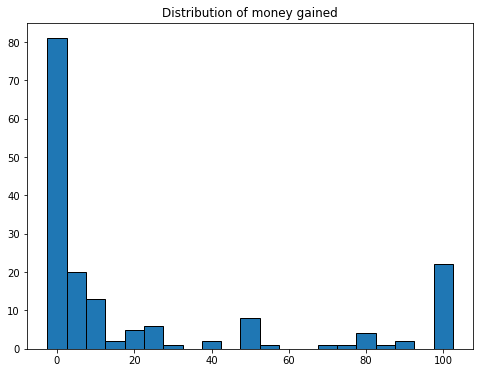

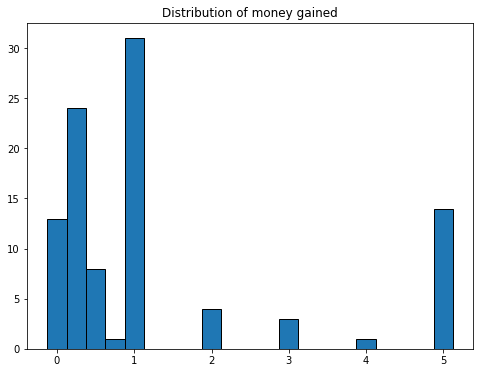

In [16]:
#clean column
data = df[df.columns[11]]
data = data.apply(pd.to_numeric,errors='coerce') #convert values to numerical
data = data.mask(data.lt(0) | data.gt(100))      #can only be between 0 and 100
data = data.round(2)                             #can only get money rounded to two decimals
clean[df.columns[11]] = data

#print number of (non)-NaN values
print(df.columns[11])
print("#values: %d"%(clean[df.columns[11]].count()))
print("#NaN: %d"%(clean[df.columns[11]].isnull().sum()))

#plot distribution between £0,00 and £100,-
fig,ax = plt.subplots(figsize=(8,6))
ax.hist(data.dropna().values,np.arange(-2.5,107.5,5), ec='black')
ax.set_title("Distribution of money gained")

#plot distribution between £0,00 and £5,-
fig,ax = plt.subplots(figsize=(8,6))
ax.hist(data.dropna().values, np.arange(-0.125,5.375,0.25), ec='black')
ax.set_title("Distribution of money gained")

#show occurances
Counter(data.dropna())

Give a random number
#values: 182
#NaN: 35


Counter({0.0: 1,
         1.0: 14,
         2.0: 16,
         3.0: 19,
         4.0: 17,
         5.0: 9,
         6.0: 13,
         6.9: 1,
         7.0: 36,
         7.44: 1,
         8.0: 27,
         9.0: 21,
         10.0: 7})

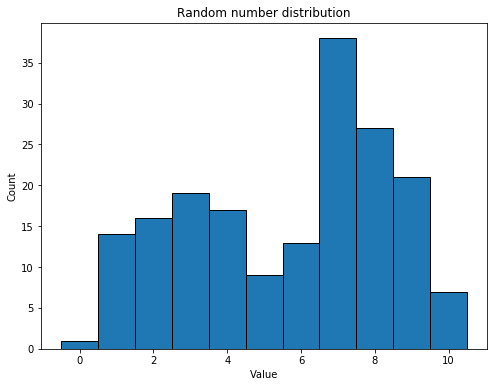

In [17]:
#Used methods from:
#https://stackoverflow.com/a/34844867 convert whole column to numeric
#https://stackoverflow.com/a/41618665 mask data to NaN if outside some range

#clean column
data = df[df.columns[12]]
data = data.str.replace('ACHT','8')
data = data.apply(pd.to_numeric,errors='coerce') #non-numeric -> NaN
data = data.mask(data.lt(0) | data.gt(10))       #can only be 0 - 10
cleaned = []
for i in data.values:
    if np.isnan(i):
        cleaned.append(np.NaN)
    else:
        cleaned.append(i)
data = pd.Series(cleaned)
clean[df.columns[12]] = data

#print number of (non)-NaN values
print(df.columns[12])
print("#values: %d"%(clean[df.columns[12]].count()))
print("#NaN: %d"%(clean[df.columns[12]].isnull().sum()))

#plot distribution and save to file
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(data.dropna().values, np.arange(-0.5,11.5,1), ec='black');
ax.set_title("Random number distribution")
ax.set_xlabel("Value")
ax.set_ylabel("Count")
fig.savefig("dist_random.pdf",bbox_inches='tight')

#print occurance
Counter(data.dropna())

Time you went to be Yesterday
#values: 212
#NaN: 5


[(-4.0, 1),
 (-3.0, 1),
 (-2.0, 11),
 (-1.0, 36),
 (0.0, 75),
 (1.0, 41),
 (2.0, 32),
 (3.0, 9),
 (4.0, 4),
 (5.0, 1),
 (6.0, 1)]

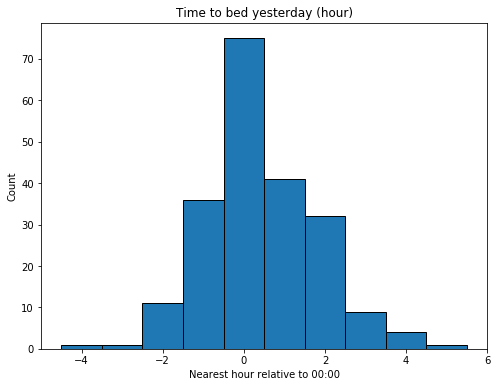

In [18]:
#Used a method from:
#https://stackoverflow.com/a/15321222 decoding unicode in string

data = df[df.columns[13]]
data = data.str.decode('unicode_escape').str.encode('ascii','ignore').str.decode('ascii')
data = data.str.lower()
data = data.str.replace(' ','')
data = data.str.replace('a.m.','')
data = data.str.replace('am','')
data = data.str.replace('pm','')
data = data.str.replace('.',':')
data = data.str.replace('300','3:00')
data = data.str.replace('2330','23:30')
data = data.str.replace('2359','23:59')
cleaned = []
for i in data.values:
    
    #split hour:minute
    time = i.split(':')
    
    #answered in hours or without :
    if len(time) == 1:
        try:
            hour = int(time[0])
            minute = 0
        except:
            hour = np.NaN
            minute = np.NaN
    
    #answered in hour:minute
    else:
        hour = int(time[0])
        minute = int(time[1])
    
    #assume 12-hour notation if time to bed between 8-12
    if hour >= 8 and hour <= 12:
        hour += 12
    if hour == 24:
        hour -= 24
    
    #sanity check
    if hour > 24 or minute > 59:
        hour = np.NaN
        minute = np.NaN
    
    if np.isnan(hour):
        cleaned.append(np.NaN)
    else:
        #store offset from 00:00 in hours
        time = np.round(hour+minute/60)%24
        if time > 6:
            time -= 24
        cleaned.append(time)
clean[df.columns[13]] = pd.Series(cleaned)

print(df.columns[13])
print("#values: %d"%(clean[df.columns[13]].count()))
print("#NaN: %d"%(clean[df.columns[13]].isnull().sum()))

#plot distribution and save to file
fig,ax = plt.subplots(figsize=(8,6))
ax.hist(clean[df.columns[13]].dropna(),np.arange(-4.5,6.5,1),ec='black')
ax.set_title("Time to bed yesterday (hour)")
ax.set_xlabel("Nearest hour relative to 00:00")
ax.set_ylabel("Count")
fig.savefig("dist_timetobed.pdf",bbox_inches='tight')

x = Counter(pd.Series(cleaned).dropna())
sorted(x.items())

# Cleaned data

In [19]:
clean.head(25)

Timestamp            What programme are you in?  \
0   4/5/2018 11:22:56          Quantitative Risk Management   
1   4/5/2018 11:23:04                      Computer Science   
2   4/5/2018 11:23:06                    Business Analytics   
3   4/5/2018 11:23:50                    Business Analytics   
4   4/5/2018 11:23:59                      Computer Science   
5   4/5/2018 11:24:34             Drug Discovery and Safety   
6   4/5/2018 11:25:25                      Computer Science   
7   4/5/2018 11:25:25                 Computational Science   
8   4/5/2018 11:25:36                          Econometrics   
9   4/5/2018 11:25:51      Bioinformatics & Systems Biology   
10  4/5/2018 11:25:54                          Econometrics   
11  4/5/2018 11:26:10                      Computer Science   
12  4/5/2018 11:26:23      Bioinformatics & Systems Biology   
13  4/5/2018 11:26:30               Artificial Intelligence   
14  4/5/2018 11:26:39  Econometrics and Operations Research   
15  4/5/2018 11:26:40      Bioinformatics & Systems Biology   
16  4/5/2018 11:26:43                    Business Analytics   
17  4/5/2018 11:26:44                    Business Analytics   
18  4/5/2018 11:26:47               Artificial Intelligence   
19  4/5/2018 11:26:54                      Computer Science   
20  4/5/2018 11:27:04                 Computational Science   
21  4/5/2018 11:27:06                      Computer Science   
22  4/5/2018 11:27:06               Artificial Intelligence   
23  4/5/2018 11:27:08               Artificial Intelligence   
24  4/5/2018 11:27:10                 Computational Science   

    Have you taken a course on machine learning?  \
0                                            0.0   
1                                            0.0   
2                                            1.0   
3                                            1.0   
4                                            0.0   
5                                            0.0   
6                                            1.0   
7                                            0.0   
8                                            0.0   
9                                            1.0   
10                                           0.0   
11                                           0.0   
12                                           1.0   
13                                           1.0   
14                                           1.0   
15                                           0.0   
16                                           1.0   
17                                           1.0   
18                                           1.0   
19                                           0.0   
20                                           0.0   
21                                           1.0   
22                                           1.0   
23                                           0.0   
24                                           0.0   

    Have you taken a course on information retrieval?  \
0                                                 0.0   
1                                                 0.0   
2                                                 1.0   
3                                                 1.0   
4                                                 0.0   
5                                                 0.0   
6                                                 1.0   
7                                                 0.0   
8                                                 0.0   
9                                                 1.0   
10                                                0.0   
11                                                0.0   
12                                                0.0   
13                                                1.0   
14                                                0.0   
15                                                0.0   
16                                                1

# Basic regression/classification

Used methods from

https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2

https://stackoverflow.com/a/39169661

## Predicting programme from having taken other courses

In [20]:
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn import metrics

In [21]:
feature_names = ['Have you taken a course on machine learning?',\
                 'Have you taken a course on information retrieval?',\
                 'Have you taken a course on statistics?',\
                 'Have you taken a course on databases?']
classification_name = 'What programme are you in?'

#only take 5 most occuring programmes as we don't have enough occurances for other
#programmes
subset = clean.loc[clean['What programme are you in?'].isin(['Artificial Intelligence',\
                                                    'Business Analytics',\
                                                    'Bioinformatics & Systems Biology',
                                                    'Computational Science',
                                                    'Computer Science'])]
#drop NaN
subset = subset[feature_names+[classification_name]].dropna()

#split subset into features and target
X = subset[feature_names]
y = subset[classification_name]

In [22]:
#use LogisticRegression model
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
predicted = cross_val_predict(logreg, X, y, cv=4)
print(metrics.classification_report(y,predicted))

print("Accuracy score: %.2f"%metrics.accuracy_score(y,predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(y,predicted))
print("Confusion matrix:")
print(metrics.confusion_matrix(y,predicted))

#print coefficients
print("Logistic Regression coefficients:")
logreg.fit(X,y)
print(logreg.coef_)

                                  precision    recall  f1-score   support

         Artificial Intelligence       0.48      0.30      0.37        47
Bioinformatics & Systems Biology       0.47      0.59      0.52        27
              Business Analytics       0.47      0.75      0.58        44
           Computational Science       0.17      0.05      0.07        21
                Computer Science       0.50      0.50      0.50        20

                     avg / total       0.44      0.47      0.43       159

Accuracy score: 0.47
Cohen Kappa score: 0.30
Confusion matrix:
[[14  5 22  3  3]
 [ 2 16  4  1  4]
 [ 4  6 33  1  0]
 [ 6  6  5  1  3]
 [ 3  1  6  0 10]]
Logistic Regression coefficients:
[[-0.50350713  1.01363912 -0.08329592 -0.54327843]
 [ 0.52401269 -1.77469124 -1.00635971 -0.68872536]
 [ 1.04793665  0.70064144  0.02009992  0.40905494]
 [-0.43463477 -0.82663672  0.09968408 -0.55836452]
 [-1.48904128 -0.21096466 -0.23753438  1.20127914]]


In [23]:
#use DecisionTree model
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
predicted = cross_val_predict(clf,X,y,cv=10)
print(metrics.classification_report(y,predicted))

print("Accuracy score: %.2f"%metrics.accuracy_score(y,predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(y,predicted))
print("Confusion matrix:")
print(metrics.confusion_matrix(y,predicted))

#print feature importances
print("Decision Tree Classifier feature importances:")
clf.fit(X,y)
print(clf.feature_importances_)

                                  precision    recall  f1-score   support

         Artificial Intelligence       0.38      0.43      0.40        47
Bioinformatics & Systems Biology       0.42      0.52      0.47        27
              Business Analytics       0.49      0.61      0.55        44
           Computational Science       0.00      0.00      0.00        21
                Computer Science       0.53      0.45      0.49        20

                     avg / total       0.39      0.44      0.41       159

Accuracy score: 0.44
Cohen Kappa score: 0.26
Confusion matrix:
[[20  6 18  1  2]
 [ 7 14  3  0  3]
 [11  6 27  0  0]
 [10  6  2  0  3]
 [ 5  1  5  0  9]]
Decision Tree Classifier feature importances:
[0.27758127 0.3219013  0.15057155 0.24994588]


In [24]:
#use K-Neighbours
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
predicted = cross_val_predict(knn,X,y,cv=10)
print(metrics.classification_report(y,predicted))

print("Accuracy score: %.2f"%metrics.accuracy_score(y,predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(y,predicted))
print("Confusion matrix:")
print(metrics.confusion_matrix(y,predicted))

                                  precision    recall  f1-score   support

         Artificial Intelligence       0.39      0.30      0.34        47
Bioinformatics & Systems Biology       0.43      0.48      0.46        27
              Business Analytics       0.51      0.68      0.58        44
           Computational Science       0.12      0.05      0.07        21
                Computer Science       0.31      0.40      0.35        20

                     avg / total       0.38      0.42      0.39       159

Accuracy score: 0.42
Cohen Kappa score: 0.24
Confusion matrix:
[[14  5 19  2  7]
 [ 4 13  2  3  5]
 [ 6  6 30  0  2]
 [ 9  5  2  1  4]
 [ 3  1  6  2  8]]


In [25]:
#use Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
predicted = cross_val_predict(lda,X,y,cv=10)
print(metrics.classification_report(y,predicted))

print("Accuracy score: %.2f"%metrics.accuracy_score(y,predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(y,predicted))
print("Confusion matrix:")
print(metrics.confusion_matrix(y,predicted))

                                  precision    recall  f1-score   support

         Artificial Intelligence       0.42      0.23      0.30        47
Bioinformatics & Systems Biology       0.47      0.63      0.54        27
              Business Analytics       0.49      0.73      0.59        44
           Computational Science       0.09      0.05      0.06        21
                Computer Science       0.43      0.45      0.44        20

                     avg / total       0.41      0.44      0.41       159

Accuracy score: 0.44
Cohen Kappa score: 0.28
Confusion matrix:
[[11  5 19  7  5]
 [ 2 17  3  1  4]
 [ 4  6 32  2  0]
 [ 6  6  5  1  3]
 [ 3  2  6  0  9]]


In [26]:
#use Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
predicted = cross_val_predict(gnb,X,y,cv=10)
print(metrics.classification_report(y,predicted))

print("Accuracy score: %.2f"%metrics.accuracy_score(y,predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(y,predicted))
print("Confusion matrix:")
print(metrics.confusion_matrix(y,predicted))

                                  precision    recall  f1-score   support

         Artificial Intelligence       0.44      0.09      0.14        47
Bioinformatics & Systems Biology       0.41      0.67      0.51        27
              Business Analytics       0.44      0.66      0.53        44
           Computational Science       0.05      0.05      0.05        21
                Computer Science       0.45      0.45      0.45        20

                     avg / total       0.39      0.38      0.34       159

Accuracy score: 0.38
Cohen Kappa score: 0.22
Confusion matrix:
[[ 4  8 22  8  5]
 [ 0 18  3  3  3]
 [ 3  6 29  6  0]
 [ 1 10  6  1  3]
 [ 1  2  6  2  9]]


In [27]:
#use Support Vector Classifier
from sklearn.svm import SVC

svm = SVC()
predicted = cross_val_predict(svm,X,y,cv=4)

print(metrics.classification_report(y,predicted))

print("Accuracy score: %.2f"%metrics.accuracy_score(y,predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(y,predicted))
print("Confusion matrix:")
print(metrics.confusion_matrix(y,predicted))

                                  precision    recall  f1-score   support

         Artificial Intelligence       0.35      0.38      0.36        47
Bioinformatics & Systems Biology       0.36      0.52      0.42        27
              Business Analytics       0.50      0.66      0.57        44
           Computational Science       0.00      0.00      0.00        21
                Computer Science       0.50      0.25      0.33        20

                     avg / total       0.36      0.42      0.38       159

Accuracy score: 0.42
Cohen Kappa score: 0.22
Confusion matrix:
[[18  9 17  0  3]
 [ 7 14  4  0  2]
 [ 6  9 29  0  0]
 [12  6  3  0  0]
 [ 9  1  5  0  5]]


C:\Users\Nick\Miniconda3\envs\ml1labs\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Predict chocolate answer

In [28]:
feature_names = ['What programme are you in?',\
                 'Time you went to be Yesterday',\
                 'What is your gender?']
classification_name = 'Chocolate makes you.....'

subset = clean[feature_names+[classification_name]].dropna()

#again use five most common programmes
subset = subset.loc[subset['What programme are you in?'].isin(['Artificial Intelligence',\
                                                    'Business Analytics',\
                                                    'Bioinformatics & Systems Biology',
                                                    'Computational Science',
                                                    'Computer Science'])]

#remove slim answer, as occurance of this answer too small for algorithms
subset = subset.loc[~subset['Chocolate makes you.....'].isin(['slim'])]

prog_enc = {
                         'Artificial Intelligence':0,\
                         'Business Analytics':1,\
                         'Bioinformatics & Systems Biology':2,\
                         'Computational Science':3,\
                         'Computer Science':4}

subset[feature_names[0]] = subset[feature_names[0]].replace(prog_enc)


X = subset[feature_names]
y = subset[classification_name]

In [29]:
from sklearn.linear_model import LogisticRegression

#https://stackoverflow.com/a/39169661
logreg=LogisticRegression()
predicted = cross_val_predict(logreg, X, y, cv=10)
print(metrics.classification_report(y, predicted))

print("Accuracy score: %.2f"%metrics.accuracy_score(y,predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(y,predicted))
print("Confusion matrix:")
print(metrics.confusion_matrix(y,predicted))

#print coefficients
print("Logistic Regression coefficients:")
logreg.fit(X,y)
print(logreg.coef_)

                                           precision    recall  f1-score   support

I have no idea what you are talking about       0.36      0.36      0.36        45
                                      fat       0.43      0.56      0.48        54
                                  neither       0.40      0.26      0.32        46

                              avg / total       0.40      0.40      0.39       145

Accuracy score: 0.40
Cohen Kappa score: 0.09
Confusion matrix:
[[16 21  8]
 [14 30 10]
 [15 19 12]]
Logistic Regression coefficients:
[[-0.32027181  0.01232961  0.357681  ]
 [ 0.09280613 -0.15951427 -0.23363351]
 [ 0.16356072  0.13683243 -0.24223264]]


In [30]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
predicted = cross_val_predict(clf,X,y,cv=10)
print(metrics.classification_report(y,predicted))

print("Accuracy score: %.2f"%metrics.accuracy_score(y,predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(y,predicted))
print("Confusion matrix:")
print(metrics.confusion_matrix(y,predicted))

#print feature importances
print("Decision Tree Classifier feature importances:")
clf.fit(X,y)
print(clf.feature_importances_)

                                           precision    recall  f1-score   support

I have no idea what you are talking about       0.44      0.53      0.48        45
                                      fat       0.39      0.41      0.40        54
                                  neither       0.44      0.33      0.38        46

                              avg / total       0.42      0.42      0.42       145

Accuracy score: 0.42
Cohen Kappa score: 0.13
Confusion matrix:
[[24 17  4]
 [17 22 15]
 [13 18 15]]
Decision Tree Classifier feature importances:
[0.35831777 0.51181749 0.12986475]


In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
predicted = cross_val_predict(knn,X,y,cv=10)
print(metrics.classification_report(y,predicted))

print("Accuracy score: %.2f"%metrics.accuracy_score(y,predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(y,predicted))
print("Confusion matrix:")
print(metrics.confusion_matrix(y,predicted))

                                           precision    recall  f1-score   support

I have no idea what you are talking about       0.44      0.62      0.51        45
                                      fat       0.35      0.33      0.34        54
                                  neither       0.40      0.26      0.32        46

                              avg / total       0.39      0.40      0.39       145

Accuracy score: 0.40
Cohen Kappa score: 0.10
Confusion matrix:
[[28 12  5]
 [23 18 13]
 [13 21 12]]


In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
predicted = cross_val_predict(lda,X,y,cv=10)
print(metrics.classification_report(y,predicted))

print("Accuracy score: %.2f"%metrics.accuracy_score(y,predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(y,predicted))
print("Confusion matrix:")
print(metrics.confusion_matrix(y,predicted))

                                           precision    recall  f1-score   support

I have no idea what you are talking about       0.36      0.38      0.37        45
                                      fat       0.43      0.56      0.49        54
                                  neither       0.45      0.28      0.35        46

                              avg / total       0.42      0.41      0.41       145

Accuracy score: 0.41
Cohen Kappa score: 0.11
Confusion matrix:
[[17 21  7]
 [15 30  9]
 [15 18 13]]


In [33]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
predicted = cross_val_predict(gnb,X,y,cv=10)
print(metrics.classification_report(y,predicted))

print("Accuracy score: %.2f"%metrics.accuracy_score(y,predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(y,predicted))
print("Confusion matrix:")
print(metrics.confusion_matrix(y,predicted))

                                           precision    recall  f1-score   support

I have no idea what you are talking about       0.41      0.27      0.32        45
                                      fat       0.41      0.65      0.50        54
                                  neither       0.32      0.22      0.26        46

                              avg / total       0.38      0.39      0.37       145

Accuracy score: 0.39
Cohen Kappa score: 0.07
Confusion matrix:
[[12 23 10]
 [ 8 35 11]
 [ 9 27 10]]


In [34]:
from sklearn.svm import SVC

svm = SVC()
predicted = cross_val_predict(svm,X,y,cv=10)
print(metrics.classification_report(y,predicted))

print("Accuracy score: %.2f"%metrics.accuracy_score(y,predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(y,predicted))
print("Confusion matrix:")
print(metrics.confusion_matrix(y,predicted))

                                           precision    recall  f1-score   support

I have no idea what you are talking about       0.50      0.51      0.51        45
                                      fat       0.51      0.67      0.58        54
                                  neither       0.52      0.33      0.40        46

                              avg / total       0.51      0.51      0.50       145

Accuracy score: 0.51
Cohen Kappa score: 0.26
Confusion matrix:
[[23 16  6]
 [10 36  8]
 [13 18 15]]


## Predict greediness based on programme and gender

In [35]:
feature_names = ['What programme are you in?',
                 'What is your gender?']
classification_name = clean.columns[11]

subset = clean[feature_names+[classification_name]].dropna()

subset.loc[subset[classification_name]<=1,classification_name] = 0 #not greedy
subset.loc[subset[classification_name]>1,classification_name] = 1  #greedy

subset = subset.loc[subset['What programme are you in?'].isin(['Artificial Intelligence',\
                                                    'Business Analytics',\
                                                    'Bioinformatics & Systems Biology',
                                                    'Computational Science',
                                                    'Computer Science'])]
prog_enc = {
                         'Artificial Intelligence':0,\
                         'Business Analytics':1,\
                         'Bioinformatics & Systems Biology':2,\
                         'Computational Science':3,\
                         'Computer Science':4}

subset[feature_names[0]] = subset[feature_names[0]].replace(prog_enc)

X = subset[feature_names]
y = subset[classification_name]

In [36]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
predicted = cross_val_predict(logreg, X, y, cv=10)
print(metrics.classification_report(y, predicted))

print("Accuracy score: %.2f"%metrics.accuracy_score(y,predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(y,predicted))
print("Confusion matrix:")
print(metrics.confusion_matrix(y,predicted))

#print coefficients
print("Logistic Regression coefficients:")
logreg.fit(X,y)
print(logreg.coef_)

             precision    recall  f1-score   support

        0.0       0.55      0.29      0.38        55
        1.0       0.59      0.81      0.68        68

avg / total       0.57      0.58      0.55       123

Accuracy score: 0.58
Cohen Kappa score: 0.10
Confusion matrix:
[[16 39]
 [13 55]]
Logistic Regression coefficients:
[[-0.21324026 -0.20442928]]


In [37]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
predicted = cross_val_predict(clf,X,y,cv=10)
print(metrics.classification_report(y,predicted))

print("Accuracy score: %.2f"%metrics.accuracy_score(y,predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(y,predicted))
print("Confusion matrix:")
print(metrics.confusion_matrix(y,predicted))

#print feature importances
print("Decision Tree Classifier feature importances:")
clf.fit(X,y)
print(clf.feature_importances_)

             precision    recall  f1-score   support

        0.0       0.55      0.71      0.62        55
        1.0       0.69      0.53      0.60        68

avg / total       0.63      0.61      0.61       123

Accuracy score: 0.61
Cohen Kappa score: 0.23
Confusion matrix:
[[39 16]
 [32 36]]
Decision Tree Classifier feature importances:
[0.93960417 0.06039583]


In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
predicted = cross_val_predict(knn,X,y,cv=10)
print(metrics.classification_report(y,predicted))

print("Accuracy score: %.2f"%metrics.accuracy_score(y,predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(y,predicted))
print("Confusion matrix:")
print(metrics.confusion_matrix(y,predicted))

             precision    recall  f1-score   support

        0.0       0.56      0.64      0.60        55
        1.0       0.67      0.60      0.64        68

avg / total       0.62      0.62      0.62       123

Accuracy score: 0.62
Cohen Kappa score: 0.24
Confusion matrix:
[[35 20]
 [27 41]]


In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
predicted = cross_val_predict(lda,X,y,cv=10)
print(metrics.classification_report(y,predicted))

print("Accuracy score: %.2f"%metrics.accuracy_score(y,predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(y,predicted))
print("Confusion matrix:")
print(metrics.confusion_matrix(y,predicted))

             precision    recall  f1-score   support

        0.0       0.55      0.29      0.38        55
        1.0       0.59      0.81      0.68        68

avg / total       0.57      0.58      0.55       123

Accuracy score: 0.58
Cohen Kappa score: 0.10
Confusion matrix:
[[16 39]
 [13 55]]


In [40]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
predicted = cross_val_predict(gnb,X,y,cv=10)
print(metrics.classification_report(y,predicted))

print("Accuracy score: %.2f"%metrics.accuracy_score(y,predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(y,predicted))
print("Confusion matrix:")
print(metrics.confusion_matrix(y,predicted))

             precision    recall  f1-score   support

        0.0       0.52      0.29      0.37        55
        1.0       0.58      0.78      0.66        68

avg / total       0.55      0.56      0.53       123

Accuracy score: 0.56
Cohen Kappa score: 0.07
Confusion matrix:
[[16 39]
 [15 53]]


In [41]:
from sklearn.svm import SVC

svm = SVC()
predicted = cross_val_predict(svm,X,y,cv=10)
print(metrics.classification_report(y,predicted))

print("Accuracy score: %.2f"%metrics.accuracy_score(y,predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(y,predicted))
print("Confusion matrix:")
print(metrics.confusion_matrix(y,predicted))

             precision    recall  f1-score   support

        0.0       0.48      0.44      0.46        55
        1.0       0.58      0.62      0.60        68

avg / total       0.53      0.54      0.53       123

Accuracy score: 0.54
Cohen Kappa score: 0.05
Confusion matrix:
[[24 31]
 [26 42]]
